# Leads Scoring Case Study

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1]:
# Importing the required libraries.

import pandas as pd , numpy as np
import matplotlib.pyplot as plt , seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns" , None)
pd.set_option("display.max_rows" , 500)






## Step - 1 : Reading and understanding the data.

In [2]:
# Loading the data set into pandas data frame.

data = pd.read_csv("Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Initial inspection of the data set.

In [3]:
# Checking the shape of the dataframe.
data.shape


(9240, 37)

##### Our dataset contains 9240 rows and 37 colums.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##### Some columns contain missing/null values , that will be taken care off.

In [5]:
# Checking the statistical values of the numerical columns using describe function.
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step - 2 : Data Cleaning.

In [6]:
# Checking for duplicate values in the data.
def check_duplicates(data):
    original_shape = data.shape
    data_copy = data.copy()
    data_copy.drop_duplicates(inplace = True)
    copy_shape = data_copy.shape

    if original_shape==copy_shape :
        return "The data does not contain any duplicate values."
    else :
        return "The data contains duplicate values."
print(check_duplicates(data))


The data does not contain any duplicate values.


##### Our data set does not contain any duplicate values.

#### Missing value treatment.

#### Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.therefore, we will replace these select values with null values. Because these values have arised due to non selection of on option by the customer.

In [7]:
# Replacing "Select" values with null values.

data = data.replace("Select" , np.nan)

In [8]:
# Checking for missing values in the data.

data.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [9]:
column_list = data.columns
missing_value_list = [i for i in column_list if data[i].isnull().mean()*100>40]
missing_value_list

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

##### The above 5 columns have missing values above our threshold of 40% , therefore dropping these columns.

In [10]:
print(data.shape)
data = data.drop(missing_value_list , axis = 1)
print(data.shape)

(9240, 37)
(9240, 30)


##### The columns with missing values have been successfully dropped.

## Step - 3 : Exploratory data analysis and data visualization.

### Analysis of categorical columns.

In [11]:
# Creating a function for column analysis that will return dtype , number of unique values and value counts of the column.
def column_analysis(x) :
    return "Data type of the column : ",data[x].dtype,"Number of unique entities in the column : ",data[x].nunique(),"Count of each value in the column : ",data[x].value_counts(dropna = False)
# Creating a function for column analysis that will return a bar graph of the value counts.
def column_visualisation(x) :
    return plt.figure(figsize = [10,5]),sns.countplot(data[x] , hue=data["Converted"]),plt.xticks(rotation = 90)
    

In [12]:
# Analysing column "Prospect ID"
print(column_analysis("Prospect ID"))

('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 9240, 'Count of each value in the column : ', 7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64)


##### Since the column "Prospect ID" contains all unique values , therefore, it is of no use for our model, hence dropping the column.

In [13]:
# Dropping column "Prospect ID"
data = data.drop("Prospect ID" , axis = 1)
data.shape

(9240, 29)

In [14]:
# Analysing column "Lead Number".
print(column_analysis("Lead Number"))

('Data type of the column : ', dtype('int64'), 'Number of unique entities in the column : ', 9240, 'Count of each value in the column : ', 660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64)


##### Since the column "Lead Number" contains all unique values , therefore, it is of no use for our model, hence dropping the column.

In [15]:
# Dropping column "Lead Number"
data = data.drop("Lead Number" , axis = 1)
data.shape

(9240, 28)

('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 5, 'Count of each value in the column : ', Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64)


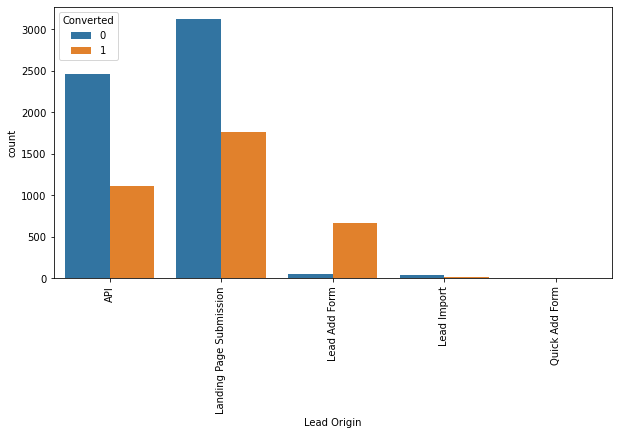

In [16]:
# Analysing column "Lead Origin".
print(column_analysis("Lead Origin"))
column_visualisation("Lead Origin")
plt.show()

#### Insights :
##### 1. Highest number of leads are coming from "Landing Page Submission" followed by "API".
##### 2. Lead generation from "Lead Add Form" is less but conversion rate is very high.
##### 3. We should focus on lead convertion rate of "Landing Page Submission" and "API".

('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 21, 'Count of each value in the column : ', Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64)


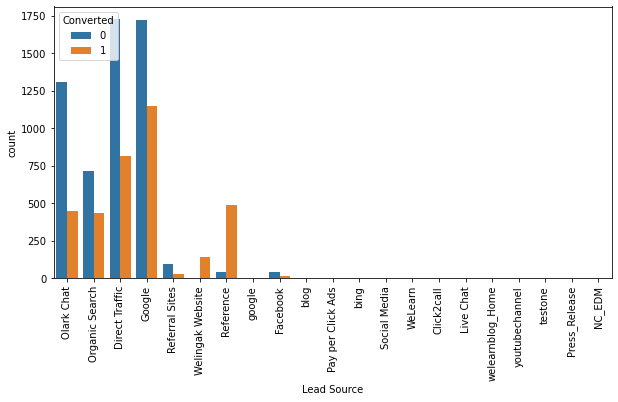

In [17]:
# Analysing column "Lead Source".
print(column_analysis("Lead Source"))
column_visualisation("Lead Source")
plt.show()

##### The column "Lead Source" contains 36 missing values and 5 values as "google" , therefore, replacing these two with "Google" which is also the mode of this column. We will also replace other less frequently occuring values to "Others".

('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 9, 'Count of each value in the column : ', Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              57
Others                21
Name: Lead Source, dtype: int64)


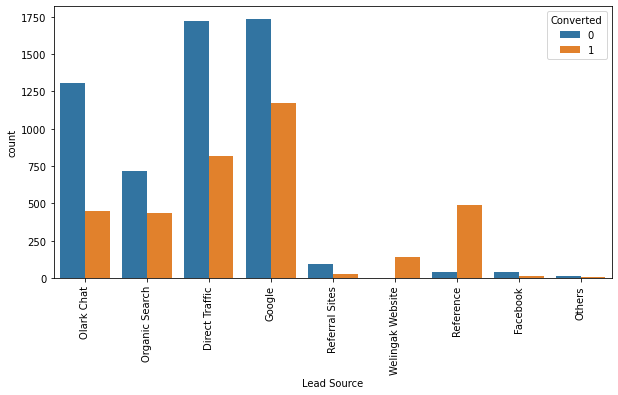

In [18]:
# Replacing null values in "Lead Source" with mode of the column.
data["Lead Source"] = data["Lead Source"].replace(np.nan , "Google")
data["Lead Source"] = data["Lead Source"].replace("google" , "Google")
data["Lead Source"] = data["Lead Source"].replace("Social Media" , "Facebook")
data["Lead Source"] = data["Lead Source"].replace(["welearnblog_Home","Pay per Click Ads","testone","blog","youtubechannel",
                                                "NC_EDM","WeLearn", "Live Chat","Press_Release","Click2call", "bing"] , "Others")
print(column_analysis("Lead Source"))
column_visualisation("Lead Source")
plt.show()

#### Insights :
##### 1. Highest number of leads are coming from "Google" and "Direct Traffic" followed by "Olark Chat".
##### 2. Highest lead conversion is recorded by "Reference" and "Welingak Website".
##### 3. We should focus on lead conversion rate of "Google" , "Direct Traffic" , "Olark Chat" and "Organic Search".

('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 2, 'Count of each value in the column : ', No     8506
Yes     734
Name: Do Not Email, dtype: int64)


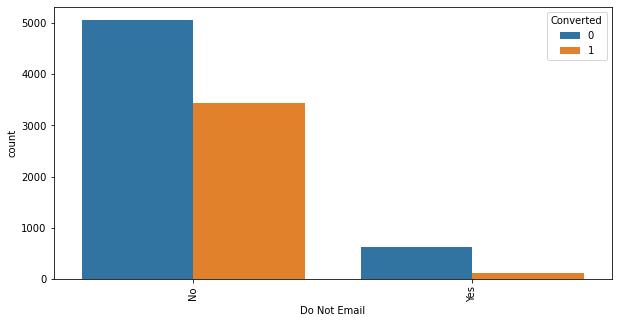

In [19]:
# Analysing column "Do Not Email".
print(column_analysis("Do Not Email"))
column_visualisation("Do Not Email")
plt.show()

('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 2, 'Count of each value in the column : ', No     9238
Yes       2
Name: Do Not Call, dtype: int64)


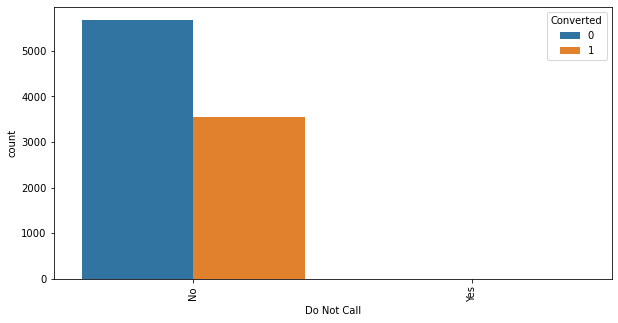

In [20]:
# Analysing column "Do Not Call".
print(column_analysis("Do Not Call"))
column_visualisation("Do Not Call")
plt.show()

##### Since, the column "Do Not Call" contains all the values as "no" and negligible 2 values as "yes",therefore, it is better to drop this column.

In [21]:
# Dropping column "Do Not Call"
data = data.drop("Do Not Call" , axis = 1)
data.shape

(9240, 27)

('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 17, 'Count of each value in the column : ', Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64)


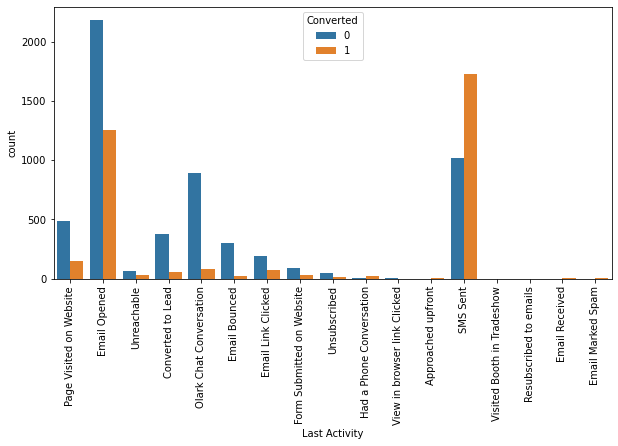

In [22]:
# Analysing column "Last Activity".
print(column_analysis("Last Activity"))
column_visualisation("Last Activity")
plt.show()

##### The column "Last Activity" contains 103 missing values which we will be imputing with the mode of the column and we will also convert less frequently occuring values with "Others".

('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 13, 'Count of each value in the column : ', Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Others                         12
Approached upfront              9
Name: Last Activity, dtype: int64)


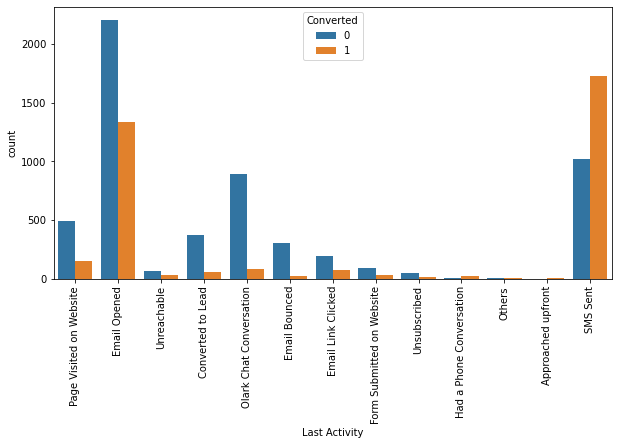

In [23]:
# Replacing null values with the mode of the column.
data["Last Activity"] = data["Last Activity"].replace(np.nan , data["Last Activity"].mode()[0])
data["Last Activity"] = data["Last Activity"].replace(["Resubscribed to emails","Visited Booth in Tradeshow",
                                "Email Marked Spam","Email Received","View in browser link Clicked"] , "Others")
print(column_analysis("Last Activity"))
column_visualisation("Last Activity")
plt.show()

#### Insights :
##### 1. Most leads are coming from "Email Opened" followed by "SMS Sent"
##### 2. "Olark Chat Conversation" is generating high humber of leads but its conversion rate is very poor.
##### 3. The conversion rate is good in case of "SMS Sent".
##### 4. We should focus on improving the conversion rate of "Email Opened" as well as "Olark Chat Conversation".

('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 38, 'Count of each value in the column : ', India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                     

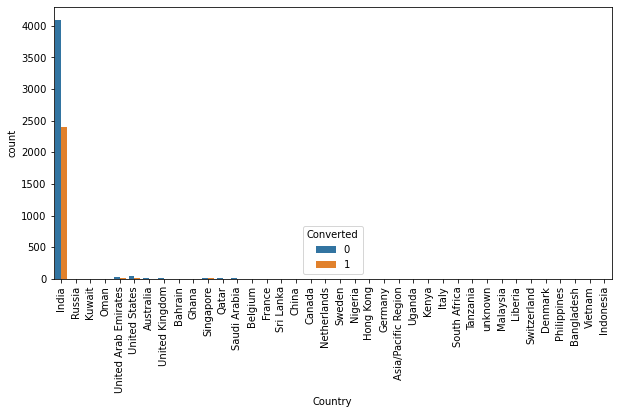

In [24]:
# Analysing column "Country".
print(column_analysis("Country"))
column_visualisation("Country")
plt.show()

##### The column "Country" contains 2461 missing values which we will be imputing with the mode of the column.

('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 38, 'Count of each value in the column : ', India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland               

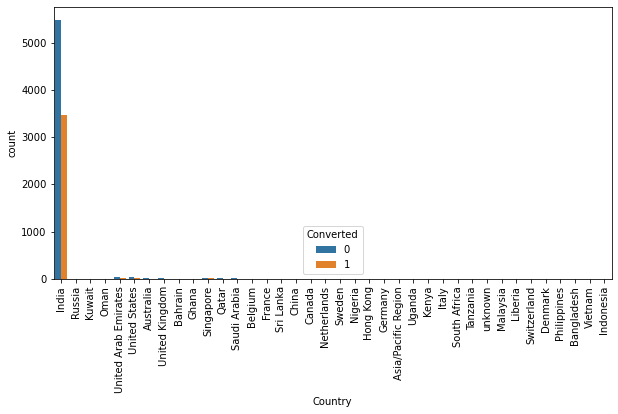

In [25]:
# Replacing null values with the mode of the column.
data["Country"] = data["Country"].replace(np.nan , data["Country"].mode()[0])
print(column_analysis("Country"))
column_visualisation("Country")
plt.show()



##### As we can see that about 97 % of the entries in the column "Country" is taken by only 1 value ie "India", therefore it is better we drop this column.

In [26]:
# Dropping column "Country"
data = data.drop("Country" , axis = 1)
data.shape

(9240, 26)

('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 18, 'Count of each value in the column : ', NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64)


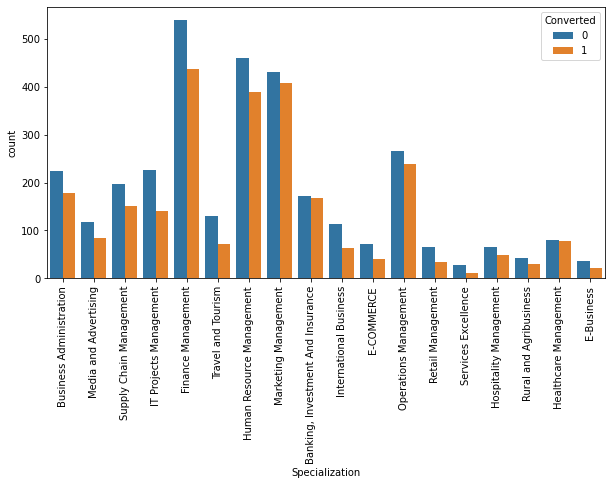

In [27]:
# Analysing column "Specialization".
print(column_analysis("Specialization"))
column_visualisation("Specialization")
plt.show()

##### There are 3380 missing values in the column "Speacialization". This might be cause the people filling the form could not find their specialization in the list of options or they might not have done any specialization till now. Therefore, we will impute these missing values with "Not Provided".

('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 19, 'Count of each value in the column : ', Not Provided                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64)


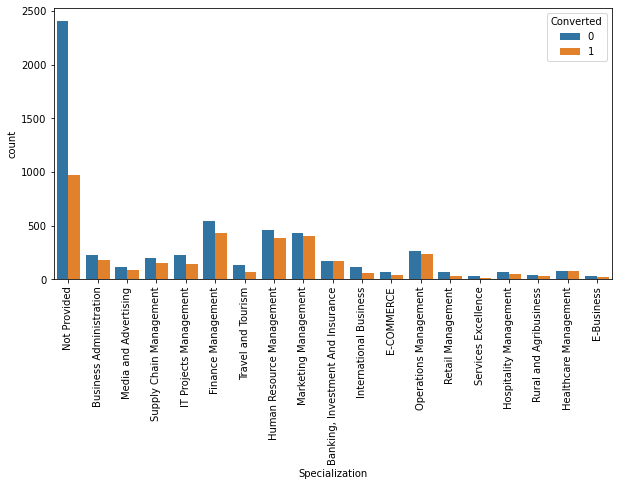

In [28]:
# Imputing the missing values with "Not Provided"
data["Specialization"] = data["Specialization"].replace(np.nan , "Not Provided")
print(column_analysis("Specialization"))
column_visualisation("Specialization")
plt.show()


#### Insights :
##### 1. Highest number of lead generators are the people from management specialization.

('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 6, 'Count of each value in the column : ', Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64)
(<Figure size 720x360 with 1 Axes>, <AxesSubplot:xlabel='What is your current occupation', ylabel='count'>, (array([0, 1, 2, 3, 4, 5]), [Text(0, 0, 'Unemployed'), Text(1, 0, 'Student'), Text(2, 0, 'Working Professional'), Text(3, 0, 'Businessman'), Text(4, 0, 'Other'), Text(5, 0, 'Housewife')]))


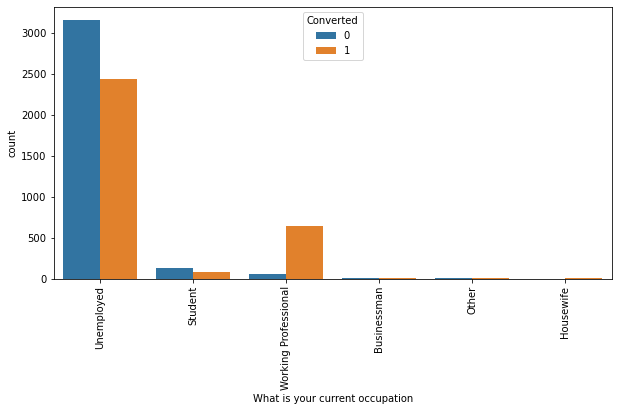

In [29]:
# Analysing column "What is your current occupation".
print(column_analysis("What is your current occupation"))
print(column_visualisation("What is your current occupation"))


##### The column "What is your current occupation" contains 2690 missing values which we will be imputing with the mode of the column.

('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 6, 'Count of each value in the column : ', Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64)


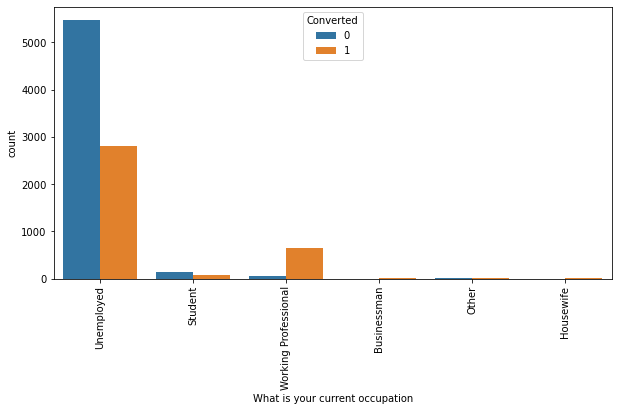

In [30]:
data["What is your current occupation"] = data["What is your current occupation"].replace(np.nan , data["What is your current occupation"].mode()[0])
print(column_analysis("What is your current occupation"))
column_visualisation("What is your current occupation")
plt.show()


#### Insights :
##### 1. Highest number of leads are coming from the unemployed category.
##### 2. Conversion rate of "Working Professional" category is quite high as compared to other categories.

('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 3, 'Count of each value in the column : ', Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64)


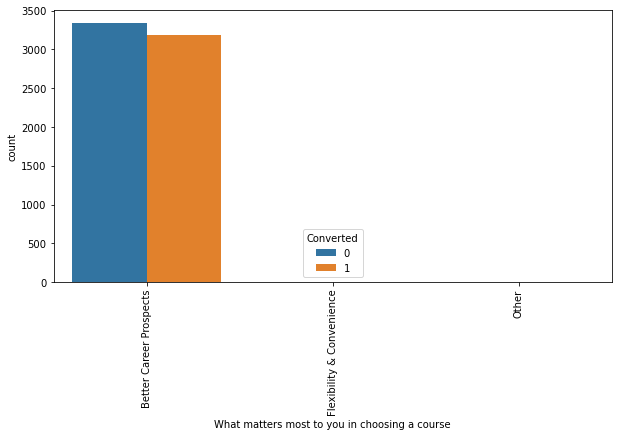

In [31]:
# Analysing column "What matters most to you in choosing a course".
print(column_analysis("What matters most to you in choosing a course"))
column_visualisation("What matters most to you in choosing a course")
plt.show()

##### The column "What matters most to you in choosing a course" contains 2709 missing values which we will be imputing with the mode of the column.

('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 3, 'Count of each value in the column : ', Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64)


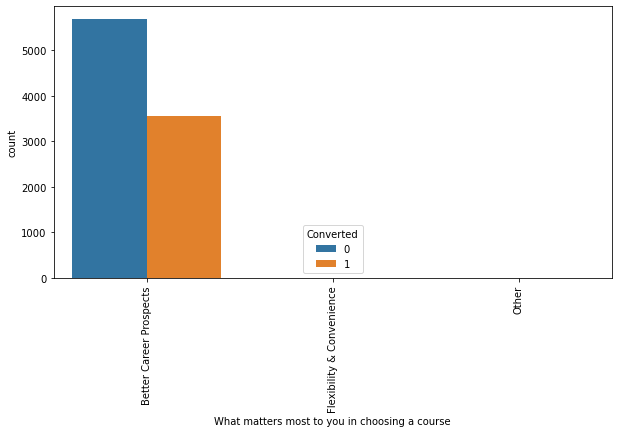

In [32]:
data["What matters most to you in choosing a course"] = data["What matters most to you in choosing a course"].replace(np.nan , data["What matters most to you in choosing a course"].mode()[0])
print(column_analysis("What matters most to you in choosing a course"))
column_visualisation("What matters most to you in choosing a course")
plt.show()



##### This column if flooded with only one type of values ie "Better Career Prospects" , hence, it is better to drop this column.

In [33]:
# Dropping column "What matters most to you in choosing a course".
data = data.drop("What matters most to you in choosing a course" , axis = 1)
print(data.shape)

(9240, 25)


**************************************Search**************************************
('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 2, 'Count of each value in the column : ', No     9226
Yes      14
Name: Search, dtype: int64)


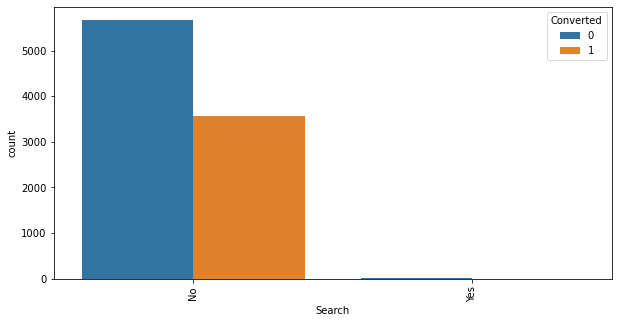

**************************************Magazine**************************************
('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 1, 'Count of each value in the column : ', No    9240
Name: Magazine, dtype: int64)


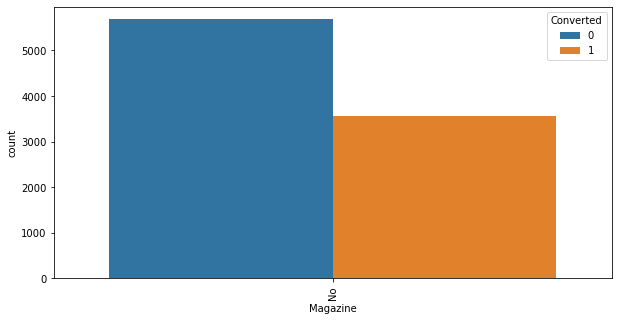

**************************************Newspaper Article**************************************
('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 2, 'Count of each value in the column : ', No     9238
Yes       2
Name: Newspaper Article, dtype: int64)


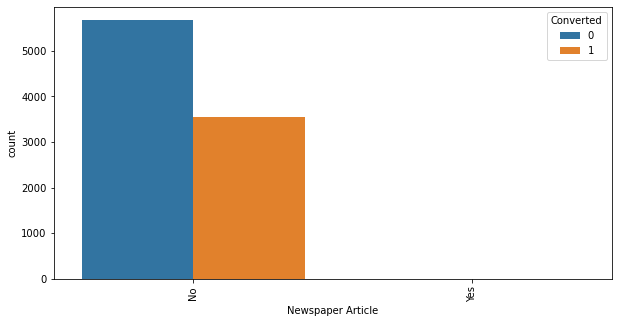

**************************************X Education Forums**************************************
('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 2, 'Count of each value in the column : ', No     9239
Yes       1
Name: X Education Forums, dtype: int64)


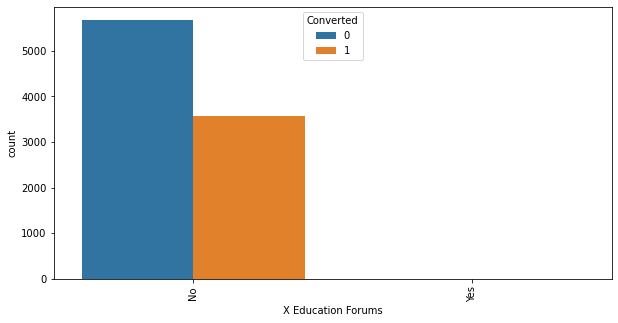

**************************************Newspaper**************************************
('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 2, 'Count of each value in the column : ', No     9239
Yes       1
Name: Newspaper, dtype: int64)


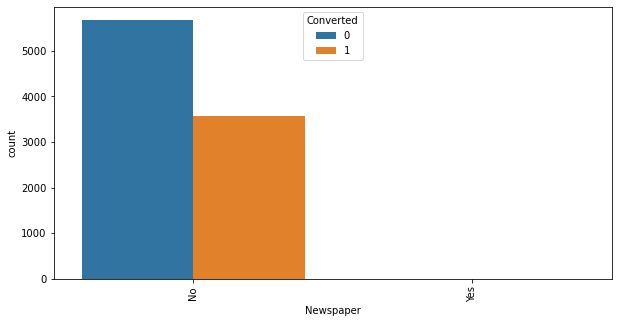

**************************************Digital Advertisement**************************************
('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 2, 'Count of each value in the column : ', No     9236
Yes       4
Name: Digital Advertisement, dtype: int64)


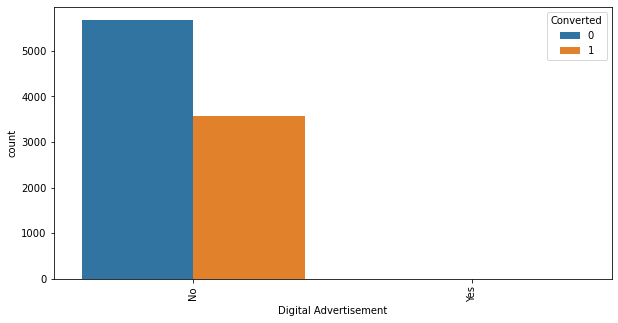

In [34]:
# Creating a list of similar columns to be analysed and visualised.

l = ["Search" , "Magazine" , "Newspaper Article","X Education Forums" ,"Newspaper" , "Digital Advertisement" ]

# Creating a for loop for analysing similar columns.
for i in l :
    print("**************************************"+ i + "**************************************")
    print(column_analysis(i))
    column_visualisation(i)
    plt.show()



##### As we can see that these columns are highly imbalanced towards one value ie "No". Therefore, we will drop these columns as they are not going to serve any purpose for our model building process.

In [35]:
# Dropping the above mentioned columns.

data = data.drop(l , axis = 1)
data.shape

(9240, 19)

**************************************Through Recommendations**************************************
('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 2, 'Count of each value in the column : ', No     9233
Yes       7
Name: Through Recommendations, dtype: int64)


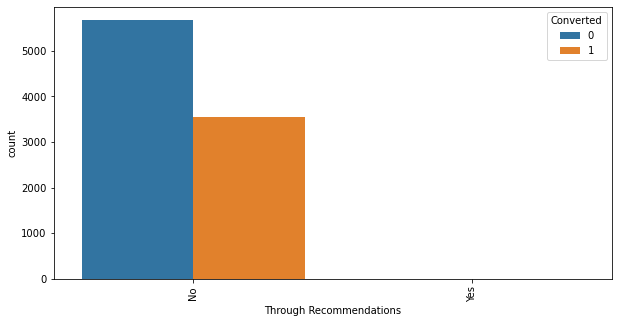

**************************************Receive More Updates About Our Courses**************************************
('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 1, 'Count of each value in the column : ', No    9240
Name: Receive More Updates About Our Courses, dtype: int64)


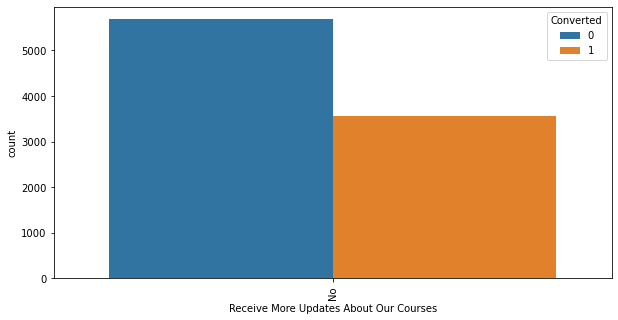

**************************************Update me on Supply Chain Content**************************************
('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 1, 'Count of each value in the column : ', No    9240
Name: Update me on Supply Chain Content, dtype: int64)


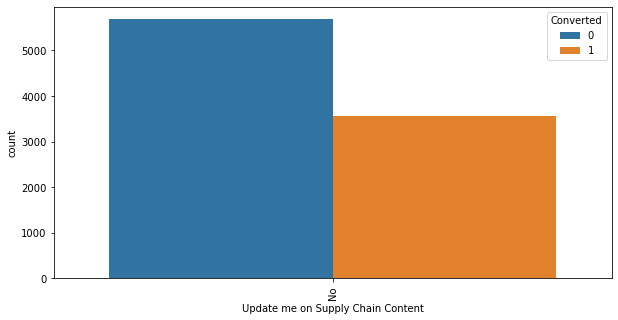

**************************************Get updates on DM Content**************************************
('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 1, 'Count of each value in the column : ', No    9240
Name: Get updates on DM Content, dtype: int64)


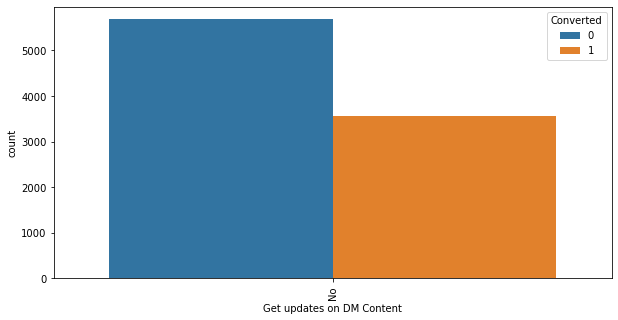

**************************************I agree to pay the amount through cheque**************************************
('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 1, 'Count of each value in the column : ', No    9240
Name: I agree to pay the amount through cheque, dtype: int64)


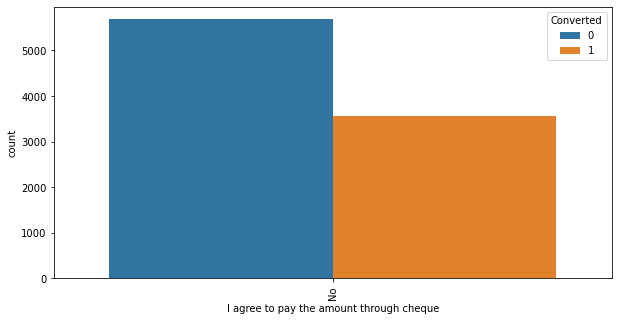

**************************************A free copy of Mastering The Interview**************************************
('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 2, 'Count of each value in the column : ', No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64)


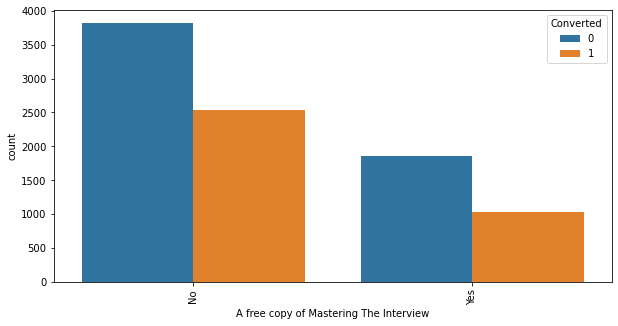

In [36]:
# Creating a list of similar columns to be analysed and visualised.

l = ["Through Recommendations" , "Receive More Updates About Our Courses" , 
     "Update me on Supply Chain Content","Get updates on DM Content" ,"I agree to pay the amount through cheque" , 
     "A free copy of Mastering The Interview" ]

# Creating a for loop for analysing similar columns.
for i in l :
    print("**************************************"+ i + "**************************************")
    print(column_analysis(i))
    column_visualisation(i)
    plt.show()



##### All the above mentioned columns are highly imbalanced towards "No" except the column "A free copy of Mastering The Interview". Therefore,we are dropping all the columns except "A free copy of Mastering The Interview" as those 5 columns are not going to contribute in our model building process.

In [37]:
# Removing our column name from the list of columns to be dropped.

l.remove("A free copy of Mastering The Interview")

# Dropping the columns.

data = data.drop(l , axis = 1)
data.shape

(9240, 14)

('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 26, 'Count of each value in the column : ', NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     

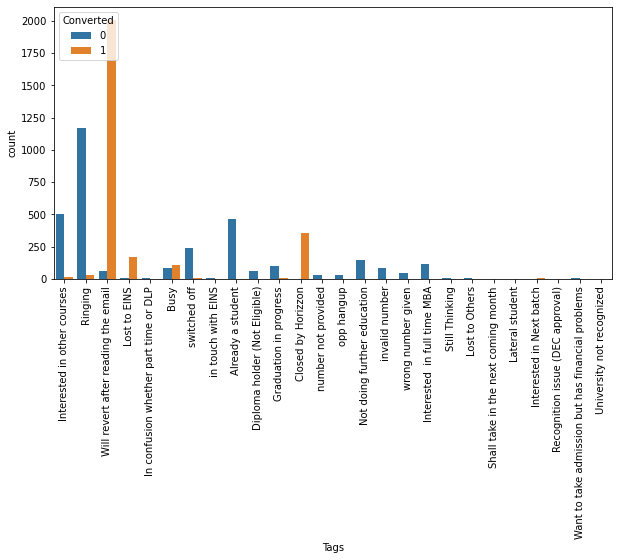

In [38]:
# Analysing column "Tags".
print(column_analysis("Tags"))
column_visualisation("Tags")
plt.show()

In [39]:
# Replacing the null/missing values with "Not Tagged"

data["Tags"] = data["Tags"].replace(np.nan , "Not Tagged")

In [40]:
# Replacing less frequently occuring values with "Others"

data["Tags"] = data["Tags"].replace(["Recognition issue (DEC approval)" , "Shall take in the next coming month",
                                    "University not recognized" , "Lateral student","Interested in Next batch" , 
                                    "In confusion whether part time or DLP" , "Want to take admission but has financial problems",
                                    "Still Thinking" , "Lost to Others" , "in touch with EINS"] , "Others")

# Combining values "number not provided" , "wrong number given" , "invalid number" into one entity ie "invalid number"

data["Tags"] = data["Tags"].replace(["number not provided" , "wrong number given"] , "invalid number")

('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 16, 'Count of each value in the column : ', Not Tagged                             3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Busy                                    186
Lost to EINS                            175
invalid number                          157
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Diploma holder (Not Eligible)            63
Others                                   49
opp hangup                               33
Name: Tags, dtype: int64)


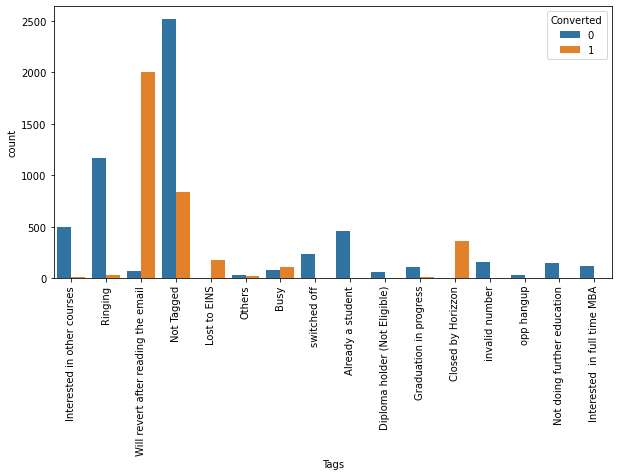

In [41]:
# Analysing column "Tags" after data cleaning.
print(column_analysis("Tags"))
column_visualisation("Tags")
plt.show()

('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 6, 'Count of each value in the column : ', NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64)


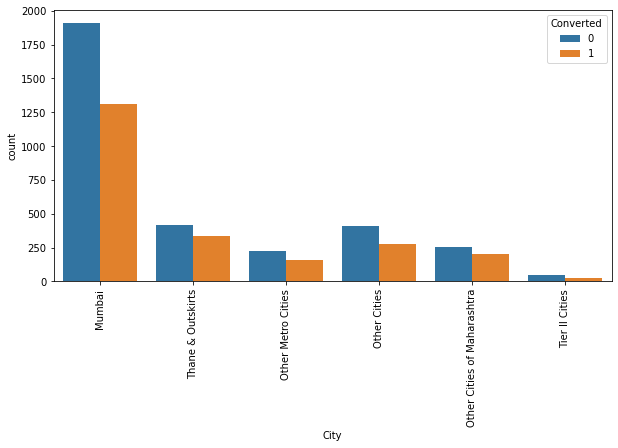

In [42]:
# Analysing column "City".
print(column_analysis("City"))
column_visualisation("City")
plt.show()

('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 7, 'Count of each value in the column : ', Not Provided                   3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64)


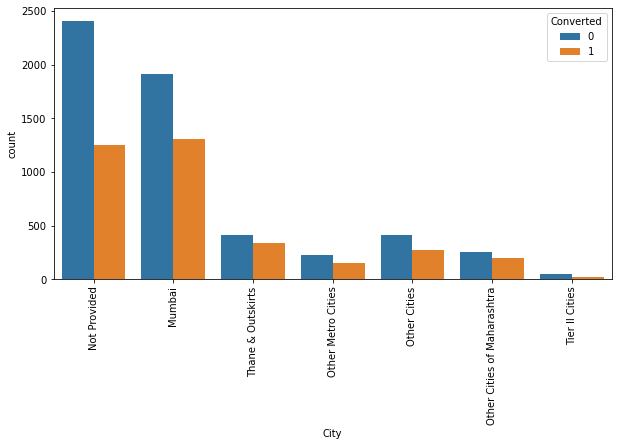

In [43]:
# Replacing null/missing values in the column "City" with "Not Provided"

data["City"] = data["City"].replace(np.nan , "Not Provided")

# Analysing column "City".
print(column_analysis("City"))
column_visualisation("City")
plt.show()

('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 16, 'Count of each value in the column : ', Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64)


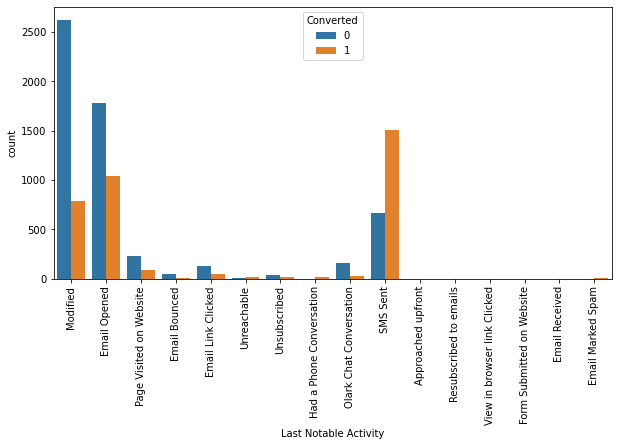

In [44]:
# Analysing column "Last Notable Activity".
print(column_analysis("Last Notable Activity"))
column_visualisation("Last Notable Activity")
plt.show()

('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 11, 'Count of each value in the column : ', Modified                    3407
Email Opened                2827
SMS Sent                    2172
Page Visited on Website      318
Olark Chat Conversation      183
Email Link Clicked           173
Email Bounced                 60
Unsubscribed                  47
Unreachable                   32
Had a Phone Conversation      14
Others                         7
Name: Last Notable Activity, dtype: int64)


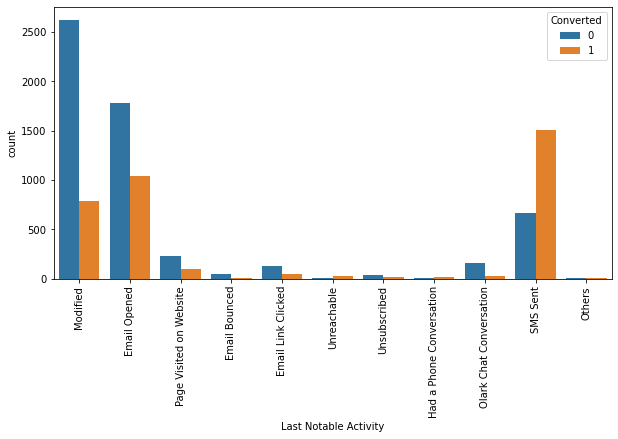

In [45]:
# Combining less frequently occuring values together into one ie "Others".

data["Last Notable Activity"] = data["Last Notable Activity"].replace(["View in browser link Clicked" , 
                                    "Form Submitted on Website" , "Resubscribed to emails" , "Email Received",
                                    "Approached upfront" , "Email Marked Spam"], "Others")

# Analysing column "Last Notable Activity" after data cleaning.
print(column_analysis("Last Notable Activity"))
column_visualisation("Last Notable Activity")
plt.show()

### Analysis of numerical columns.

0    5679
1    3561
Name: Converted, dtype: int64


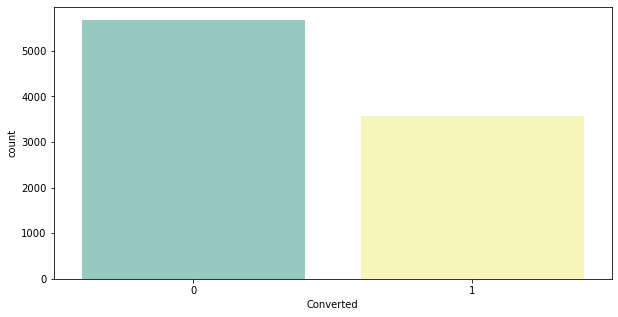

In [46]:
# Visualising our target column "Converted" to find out any imbalance in the data.

print(data["Converted"].value_counts())
plt.figure(figsize = [10,5])
sns.countplot(data["Converted"] , palette="Set3")
plt.show()

##### No imbalance in the target column.

In [47]:
# Creating a list of numerical columns

num_cols = ["TotalVisits","Total Time Spent on Website" , "Page Views Per Visit" ]





In [48]:
# Checking for null values in the numerical columns.
data[num_cols].isnull().mean()*100

TotalVisits                    1.482684
Total Time Spent on Website    0.000000
Page Views Per Visit           1.482684
dtype: float64

##### There are null values present in the columns "TotalVisits" and "Page Views Per Visit". Hence, we will impute them with the median of the respective column.

In [49]:
# Imputing the missing values with median.

data["TotalVisits"] = data["TotalVisits"].fillna(data["TotalVisits"].median())
data["Page Views Per Visit"] = data["Page Views Per Visit"].fillna(data["Page Views Per Visit"].median())

In [50]:
# Checking for null values in the numerical columns.
data[num_cols].isnull().mean()*100

TotalVisits                    0.0
Total Time Spent on Website    0.0
Page Views Per Visit           0.0
dtype: float64

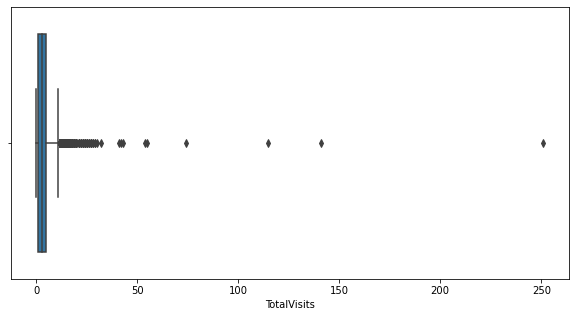

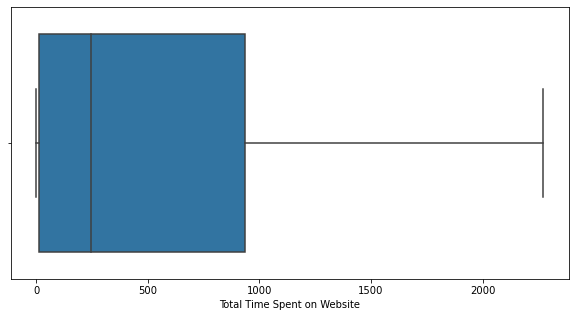

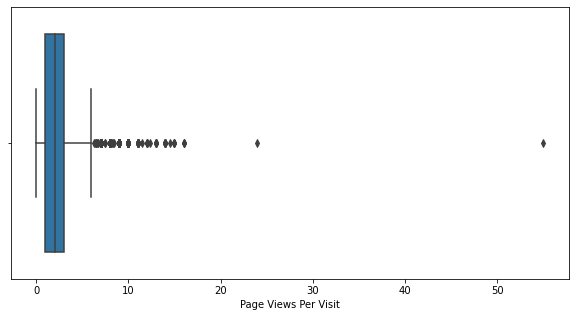

In [51]:
# Visualising numerical columns with the help of a box plot.

for i in num_cols :
    plt.figure(figsize = [10,5])
    sns.boxplot(data[i] , orient="v")
    plt.show()

##### The columns "TotalVisits" and "Page Views Per Visit" contain outliers also, we will treat the outliers by capping.

In [52]:
num_cols = ["TotalVisits" , "Page Views Per Visit" ]

# Creating a function for outliear treatment.

def capping(x) :
    if x>=lowerbound and x<=upperbound:
        return x
    elif x<lowerbound :
        return lowerbound
    elif x>upperbound :
        return upperbound



for i in num_cols :
    Q3 = data[i].quantile(0.75)
    Q1 = data[i].quantile(0.25)
    IQR = Q3-Q1
    upperbound = Q3+(1.5*IQR)
    lowerbound = Q1-(1.5*IQR)
    data[i] = data[i].apply(capping )


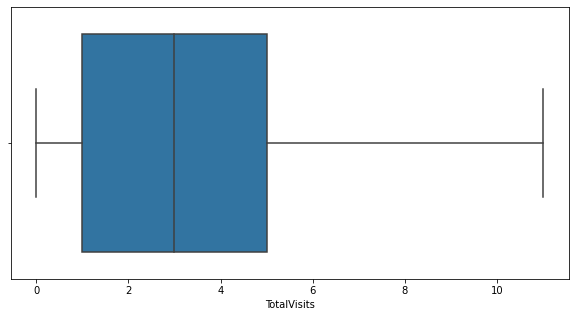

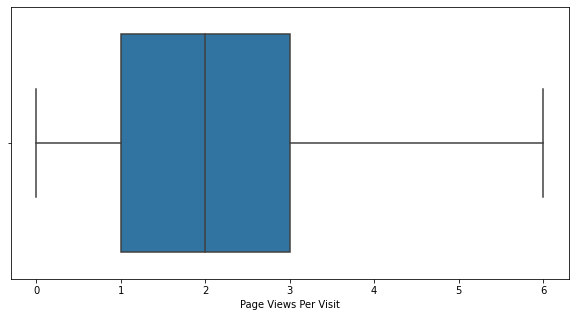

In [53]:
# Visualising numerical columns with the help of a box plot after outlier treatment.

for i in num_cols :
    plt.figure(figsize = [10,5])
    sns.boxplot(data[i] , orient="v")
    plt.show()

##### Outliers treated successfully.

### Visualising numerical columns with our target variable.

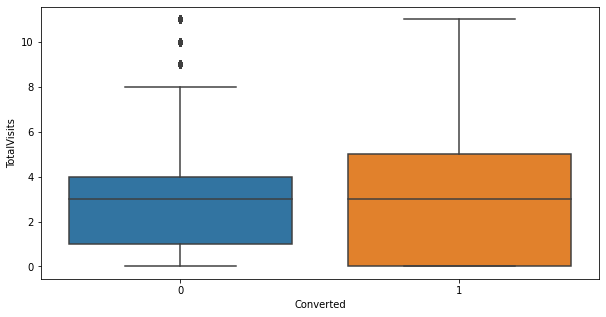

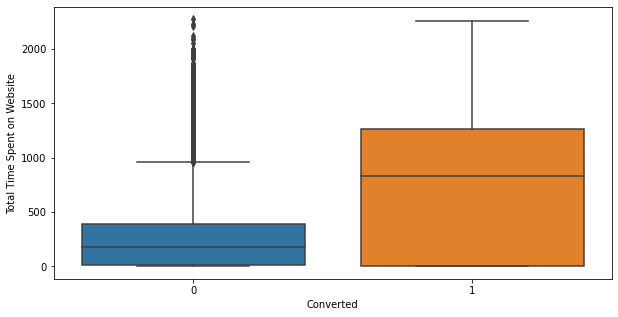

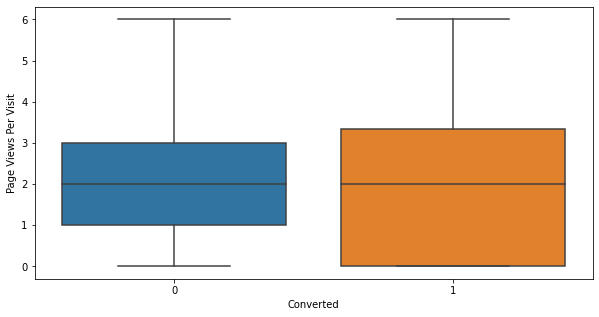

In [54]:
num_cols = ["TotalVisits","Total Time Spent on Website" , "Page Views Per Visit" ]

for i in num_cols :
    plt.figure(figsize = [10,5])
    sns.boxplot(x = "Converted" , y = i , data = data , orient="v")
    plt.show()

# Visualising numerical columns with the help of a heat map.

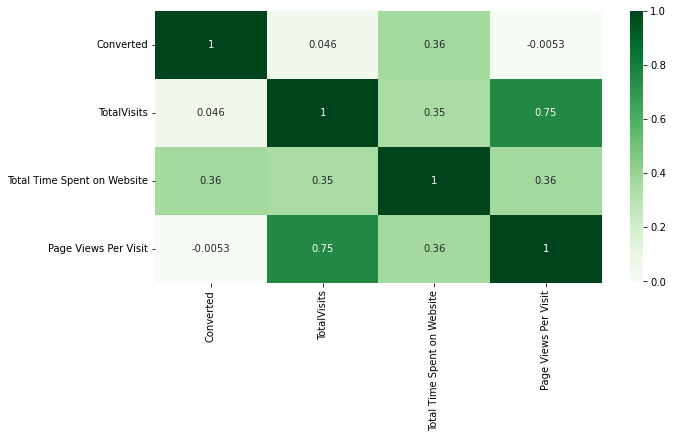

In [55]:
d = data.corr()
plt.figure(figsize = [10,5])
sns.heatmap(d , annot=True , cmap = "Greens")
plt.show()

##### Variables "TotalVisits" and "Page Views Per Visit" have a high correlation.

## Step - 4 : Data Preparation.

### Now we will do binary mapping of columns "A free copy of Mastering The Interview" and "Do Not Email" as they contain only 2 categories ie. "Yes" and "No".


In [56]:
print(column_analysis("A free copy of Mastering The Interview"))
print(column_analysis("Do Not Email"))

('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 2, 'Count of each value in the column : ', No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64)
('Data type of the column : ', dtype('O'), 'Number of unique entities in the column : ', 2, 'Count of each value in the column : ', No     8506
Yes     734
Name: Do Not Email, dtype: int64)


In [57]:
# Creating a list of columns at which binary mapping is to be performed.

l = ["A free copy of Mastering The Interview" , "Do Not Email"]


# Defing a function binary_mapping to map the values "Yes" with 1 and "No" with 0.

def binary_mapping(x) :
    return x.map({"Yes" : 1 , "No" : 0})
    
# Applying the function to our concerned columns.

data[l] = data[l].apply(binary_mapping)



In [58]:
print(column_analysis("A free copy of Mastering The Interview"))
print(column_analysis("Do Not Email"))

('Data type of the column : ', dtype('int64'), 'Number of unique entities in the column : ', 2, 'Count of each value in the column : ', 0    6352
1    2888
Name: A free copy of Mastering The Interview, dtype: int64)
('Data type of the column : ', dtype('int64'), 'Number of unique entities in the column : ', 2, 'Count of each value in the column : ', 0    8506
1     734
Name: Do Not Email, dtype: int64)


### Dummy variables.

In [59]:
# Renaming the column "What is your current occupation" with "Current Occupation" as this long name 
# will create disturbance after creating dummy variables.

data = data.rename(columns={"What is your current occupation" : "Current Occupation"})



In [60]:
# Creating a list of columns on which we will create dummy variables.

dummy_list = ["Lead Origin" ,"Lead Source" , "Last Activity" , "Specialization" , "Current Occupation" , "Tags",
             "City" , "Last Notable Activity"]

In [61]:
# Checking the datatypes of our variables
data[dummy_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Lead Origin            9240 non-null   object
 1   Lead Source            9240 non-null   object
 2   Last Activity          9240 non-null   object
 3   Specialization         9240 non-null   object
 4   Current Occupation     9240 non-null   object
 5   Tags                   9240 non-null   object
 6   City                   9240 non-null   object
 7   Last Notable Activity  9240 non-null   object
dtypes: object(8)
memory usage: 577.6+ KB


In [62]:
# Changing the datatype of columns from object to category.
for i in dummy_list :
    data[i] = data[i].astype("category")
data[dummy_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Lead Origin            9240 non-null   category
 1   Lead Source            9240 non-null   category
 2   Last Activity          9240 non-null   category
 3   Specialization         9240 non-null   category
 4   Current Occupation     9240 non-null   category
 5   Tags                   9240 non-null   category
 6   City                   9240 non-null   category
 7   Last Notable Activity  9240 non-null   category
dtypes: category(8)
memory usage: 75.8 KB


In [63]:
# Creating dummy variables.

data = pd.get_dummies(data , drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 84 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Do Not Email                                    9240 non-null   int64  
 1   Converted                                       9240 non-null   int64  
 2   TotalVisits                                     9240 non-null   float64
 3   Total Time Spent on Website                     9240 non-null   int64  
 4   Page Views Per Visit                            9240 non-null   float64
 5   A free copy of Mastering The Interview          9240 non-null   int64  
 6   Lead Origin_Landing Page Submission             9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                       9240 non-null   uint8  
 8   Lead Origin_Lead Import                         9240 non-null   uint8  
 9   Lead Origin_Quick Add Form               

In [64]:
# Checking the shape of the data set after dummy creation.
data.shape

(9240, 84)

## Step 5 : Splitting the data into training and test sets.

In [65]:
# Importing required libraries for the train test split

import sklearn
from sklearn.model_selection import train_test_split

In [66]:
np.random.seed(0)

In [67]:
data_train , data_test = train_test_split(data , train_size=0.70 , test_size=0.30 , random_state=100)

In [68]:
# Checking the shape of train and test data.

print("data_train : ",data_train.shape)
print("*****************************")
print("data_test : ",data_test.shape)

data_train :  (6468, 84)
*****************************
data_test :  (2772, 84)


## Step - 6 : Rescalling of numerical features. We will use min max scaler.

In [69]:
# Importing required libraries for rescaling.

from sklearn.preprocessing import MinMaxScaler

In [70]:
# Creating an instance of MinMaxScaler

scaler = MinMaxScaler()

In [71]:
# Creating a list of numerical coulumns on which we will perform scaling.

num_cols = ["TotalVisits" ,"Total Time Spent on Website" , "Page Views Per Visit" ]

In [72]:
# Rescaling of numerical features.

data_train[num_cols] = scaler.fit_transform(data_train[num_cols])

In [73]:
data_train.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Provided,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Tagged,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_opp hangup,Tags_switched off,City_Not Provided,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
1871,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6795,0,0,0.363636,0.214349,0.221667,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3516,0,0,0.454545,0.046655,0.416667,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8105,0,0,0.454545,0.541373,0.833333,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3934,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [74]:
data_train.describe()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Provided,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Tagged,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_opp hangup,Tags_switched off,City_Not Provided,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.078386,0.381262,0.292025,0.212974,0.374255,0.311843,0.528139,0.079468,0.005102,0.000155,0.005411,0.320810,0.190167,0.121058,0.002474,0.060297,0.014224,0.014069,0.046073,0.036333,0.028293,0.381262,0.012678,0.003401,0.102195,0.001546,0.072047,0.300402,0.008813,0.006030,0.043599,0.005720,0.012987,0.105442,0.015615,0.013451,0.091682,0.037260,0.018707,0.093383,0.020563,0.367502,0.057205,0.010823,0.007267,0.004793,0.037570,0.021336,0.001391,0.001237,0.021027,0.897805,0.077613,0.019326,0.038188,0.007267,0.010359,0.012523,0.056895,0.017316

In [75]:
# Calculating the conversion rate.

conversion = (sum(data["Converted"])/len(data["Converted"].index))*100
conversion

38.53896103896104

##### We have about 38.5 % conversion rate.

## Step - 7 : Model Building.

In [76]:
# Dividing our training and test data into X and y for model building.

y_train = data_train.pop("Converted")
X_train = data_train
y_test = data_test.pop("Converted")
X_test = data_test

## RFE  - Recursive Elimination Feature


In [77]:
# Importing RFE and logistic Regression.

from sklearn.linear_model import LogisticRegression
from sklearn. feature_selection import RFE

In [78]:
logreg = LogisticRegression()

In [79]:
rfe = RFE(logreg , n_features_to_select=20 , step=1)  # running RFE with 20 variables as output.
rfe = rfe.fit(X_train , y_train)

In [80]:
rfe.support_

array([ True, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False, False,  True,  True, False,  True,  True,
        True,  True, False,  True, False, False, False, False, False,
       False,  True, False, False,  True,  True, False, False,  True,
       False, False])

In [81]:
list(zip(X_train.columns  , rfe.support_ , rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 30),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 59),
 ('Lead Origin_Quick Add Form', False, 22),
 ('Lead Source_Facebook', False, 29),
 ('Lead Source_Google', False, 40),
 ('Lead Source_Olark Chat', False, 11),
 ('Lead Source_Organic Search', False, 61),
 ('Lead Source_Others', False, 38),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', False, 33),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 15),
 ('Last Activity_Email Bounced', False, 23),
 ('Last Activity_Email Link Clicked', False, 35),
 ('Last Activity_Email Opened', False, 62),
 ('Last Activity_Form Submitted on Website', False, 41),
 ('Last Activity_Had a Phone Conversation', False, 64),
 ('Last Ac

In [82]:
# List of columns selected by RFE for initial model building.

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Lost to EINS',
       'Tags_Not Tagged', 'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [83]:
# List of columns not selected by RFE.

X_train.columns[~rfe.support_]

Index(['TotalVisits', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management

In [85]:
import statsmodels.api as sm

In [86]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1258.4
Date:                Sun, 26 Feb 2023   Deviance:                       2516.8
Time:                        15:27:38   Pearson chi2:                 9.09e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6095
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.7045      0.247    -14.982      0.000      -4.189      -3.220
Do Not Email                                     -0.8348      0.233     -3.581      0.000      -1.292      -0.378
Total Time Spent on Website                       3.9822      0.234     16.996      0.000       3.523       4.441
Page Views Per Visit                             -1.3473      0.208     -6.492      0.000      -1.754      -0.941
Lead Origin_Lead Add Form                         0.7016      0.356      1.970      0.049       0.004       1.400
Lead Source_Welingak Website                      4.0886      0.814      5.020      0.000       2.492       5.685
Last Activity_SMS Sent                            1.3698      0.219      6.248      0.000       0.940       1.799
Tags_Busy                                         2.4250      0.322      7.520      0.000       1.793       3.057
Tags_Closed by Horizzon                           9.3270      1.046      8.916      0.000       7.277      11.377
Tags_Diploma holder (Not Eligible)              -21.0073   1.72e+04     -0.001      0.999   -3.37e+04    3.37e+04
Tags_Lost to EINS                                 8.0735      0.765     10.554      0.000       6.574       9.573
Tags_Not Tagged                                   2.0908      0.236      8.872      0.000       1.629       2.553
Tags_Others                                       2.9146      0.488      5.977      0.000       1.959       3.870
Tags_Ringing                                     -1.5010      0.324     -4.626      0.000      -2.137      -0.865
Tags_Will revert after reading the email          6.5186      0.285     22.884      0.000       5.960       7.077
Tags_invalid number                              -2.7857      1.103     -2.525      0.012      -4.948      -0.624
Tags_switched off                                -1.7008      0.579     -2.939      0.003      -2.835      -0.567
Last Notable Activity_Email Link Clicked         -1.1315      0.463     -2.443      0.015      -2.039      -0.224
Last Notable Activity_Modified                   -1.4626      0.151     -9.703      0.000      -1.758      -1.167
Last Notable Activity_Olark Chat Conversation    -1.2445      0.414     -3.007      0.003      -2.056      -0.433
Last Notable Activity_SMS Sent                    0.8497      0.257      3.309      0.001       0.346       1.353
=================================================================================================================
"""

#dropping column with high p-value

col = col.drop('Tags_Ringing',1)p-value of variable Tags_Will revert after reading the email, so we can drop it.

In [188]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2155.8
Date:                Sun, 26 Feb 2023   Deviance:                       4311.6
Time:                        16:20:15   Pearson chi2:                 8.19e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4846
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.4346      0.090     -4.824      0.000      -0.611      -0.258
Do Not Email                                     -1.3210      0.180     -7.329      0.000      -1.674      -0.968
Total Time Spent on Website                       4.3327      0.179     24.271      0.000       3.983       4.683
Page Views Per Visit                             -0.9510      0.150     -6.326      0.000      -1.246      -0.656
Lead Origin_Lead Add Form                         2.7100      0.234     11.590      0.000       2.252       3.168
Lead Source_Welingak Website                      2.3005      0.767      2.998      0.003       0.797       3.805
Last Activity_SMS Sent                            1.8299      0.088     20.726      0.000       1.657       2.003
Tags_Busy                                        -0.9691      0.227     -4.260      0.000      -1.415      -0.523
Tags_Closed by Horizzon                           5.4235      1.014      5.349      0.000       3.436       7.411
Tags_Diploma holder (Not Eligible)              -24.5715   1.66e+04     -0.001      0.999   -3.25e+04    3.25e+04
Tags_Not Tagged                                  -1.3185      0.084    -15.737      0.000      -1.483      -1.154
Tags_Others                                      -0.7357      0.451     -1.632      0.103      -1.619       0.148
Tags_Ringing                                     -4.9440      0.233    -21.185      0.000      -5.401      -4.487
Tags_invalid number                              -6.0357      1.089     -5.543      0.000      -8.170      -3.902
Last Notable Activity_Email Link Clicked         -0.7466      0.306     -2.436      0.015      -1.347      -0.146
Last Notable Activity_Modified                   -1.5904      0.087    -18.365      0.000      -1.760      -1.421
Last Notable Activity_Olark Chat Conversation    -1.1998      0.324     -3.703      0.000      -1.835      -0.565
=================================================================================================================
"""

In [189]:
#dropping column with high p-value

col = col.drop('Tags_Ringing',1)

In [195]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2702.4
Date:                Sun, 26 Feb 2023   Deviance:                       5404.8
Time:                        16:24:47   Pearson chi2:                 6.19e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.3897
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0947      0.081    -13.466      0.000      -1.254      -0.935
Do Not Email                                     -1.1368      0.162     -6.996      0.000      -1.455      -0.818
Total Time Spent on Website                       4.2090      0.155     27.207      0.000       3.906       4.512
Page Views Per Visit                             -1.0735      0.134     -7.995      0.000      -1.337      -0.810
Lead Origin_Lead Add Form                         2.6549      0.193     13.778      0.000       2.277       3.033
Lead Source_Welingak Website                      2.2669      0.749      3.027      0.002       0.799       3.735
Last Activity_SMS Sent                            1.3252      0.073     18.220      0.000       1.183       1.468
Tags_Busy                                         0.0070      0.215      0.032      0.974      -0.414       0.428
Tags_Closed by Horizzon                           5.8666      1.012      5.798      0.000       3.883       7.850
Tags_Diploma holder (Not Eligible)              -23.8640   1.69e+04     -0.001      0.999   -3.31e+04     3.3e+04
Tags_Not Tagged                                  -0.5321      0.075     -7.094      0.000      -0.679      -0.385
Tags_Others                                      -0.0280      0.431     -0.065      0.948      -0.873       0.817
Tags_invalid number                              -4.8768      1.069     -4.562      0.000      -6.972      -2.782
Last Notable Activity_Email Link Clicked         -0.6392      0.289     -2.215      0.027      -1.205      -0.074
Last Notable Activity_Modified                   -1.1962      0.080    -15.032      0.000      -1.352      -1.040
Last Notable Activity_Olark Chat Conversation    -0.9954      0.313     -3.181      0.001      -1.609      -0.382
=================================================================================================================
"""

In [196]:
#dropping column with high p-value

col = col.drop('Tags_Others',1)

In [197]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2702.4
Date:                Sun, 26 Feb 2023   Deviance:                       5404.8
Time:                        16:25:55   Pearson chi2:                 6.19e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.3897
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0949      0.081    -13.483      0.000      -1.254      -0.936
Do Not Email                                     -1.1371      0.162     -7.001      0.000      -1.455      -0.819
Total Time Spent on Website                       4.2090      0.155     27.206      0.000       3.906       4.512
Page Views Per Visit                             -1.0733      0.134     -7.996      0.000      -1.336      -0.810
Lead Origin_Lead Add Form                         2.6549      0.193     13.779      0.000       2.277       3.033
Lead Source_Welingak Website                      2.2671      0.749      3.027      0.002       0.799       3.735
Last Activity_SMS Sent                            1.3251      0.073     18.222      0.000       1.183       1.468
Tags_Busy                                         0.0072      0.215      0.034      0.973      -0.414       0.428
Tags_Closed by Horizzon                           5.8670      1.012      5.798      0.000       3.884       7.850
Tags_Diploma holder (Not Eligible)              -23.8637   1.69e+04     -0.001      0.999   -3.31e+04     3.3e+04
Tags_Not Tagged                                  -0.5318      0.075     -7.104      0.000      -0.679      -0.385
Tags_invalid number                              -4.8765      1.069     -4.562      0.000      -6.971      -2.782
Last Notable Activity_Email Link Clicked         -0.6391      0.289     -2.215      0.027      -1.205      -0.073
Last Notable Activity_Modified                   -1.1965      0.079    -15.055      0.000      -1.352      -1.041
Last Notable Activity_Olark Chat Conversation    -0.9954      0.313     -3.181      0.001      -1.609      -0.382
=================================================================================================================
"""

In [202]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2702.4
Date:                Sun, 26 Feb 2023   Deviance:                       5404.8
Time:                        16:28:44   Pearson chi2:                 6.19e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.3897
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0949      0.081    -13.483      0.000      -1.254      -0.936
Do Not Email                                     -1.1371      0.162     -7.001      0.000      -1.455      -0.819
Total Time Spent on Website                       4.2090      0.155     27.206      0.000       3.906       4.512
Page Views Per Visit                             -1.0733      0.134     -7.996      0.000      -1.336      -0.810
Lead Origin_Lead Add Form                         2.6549      0.193     13.779      0.000       2.277       3.033
Lead Source_Welingak Website                      2.2671      0.749      3.027      0.002       0.799       3.735
Last Activity_SMS Sent                            1.3251      0.073     18.222      0.000       1.183       1.468
Tags_Busy                                         0.0072      0.215      0.034      0.973      -0.414       0.428
Tags_Closed by Horizzon                           5.8670      1.012      5.798      0.000       3.884       7.850
Tags_Diploma holder (Not Eligible)              -23.8637   1.69e+04     -0.001      0.999   -3.31e+04     3.3e+04
Tags_Not Tagged                                  -0.5318      0.075     -7.104      0.000      -0.679      -0.385
Tags_invalid number                              -4.8765      1.069     -4.562      0.000      -6.971      -2.782
Last Notable Activity_Email Link Clicked         -0.6391      0.289     -2.215      0.027      -1.205      -0.073
Last Notable Activity_Modified                   -1.1965      0.079    -15.055      0.000      -1.352      -1.041
Last Notable Activity_Olark Chat Conversation    -0.9954      0.313     -3.181      0.001      -1.609      -0.382
=================================================================================================================
"""

In [185]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [174]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,Page Views Per Visit,2.91
1,Total Time Spent on Website,2.34
13,Tags_Will revert after reading the email,2.17
10,Tags_Not Tagged,1.84
3,Lead Origin_Lead Add Form,1.82
5,Last Activity_SMS Sent,1.70
17,Last Notable Activity_Modified,1.53
7,Tags_Closed by Horizzon,1.42
12,Tags_Ringing,1.42
4,Lead Source_Welingak Website,1.28


In [176]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1264.0
Date:                Sun, 26 Feb 2023   Deviance:                       2527.9
Time:                        16:08:45   Pearson chi2:                 9.17e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6088
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.6037      0.244    -14.770      0.000      -4.082      -3.125
Do Not Email                                     -0.8045      0.233     -3.459      0.001      -1.260      -0.349
Total Time Spent on Website                       3.9712      0.234     17.001      0.000       3.513       4.429
Page Views Per Visit                             -1.4016      0.205     -6.831      0.000      -1.804      -0.999
Lead Origin_Lead Add Form                         0.6934      0.358      1.934      0.053      -0.009       1.396
Lead Source_Welingak Website                      4.1071      0.820      5.011      0.000       2.501       5.714
Last Activity_SMS Sent                            1.9821      0.117     16.922      0.000       1.753       2.212
Tags_Busy                                         2.4554      0.320      7.683      0.000       1.829       3.082
Tags_Closed by Horizzon                           9.4834      1.047      9.061      0.000       7.432      11.535
Tags_Diploma holder (Not Eligible)              -21.0446    1.7e+04     -0.001      0.999   -3.33e+04    3.32e+04
Tags_Lost to EINS                                 8.2128      0.768     10.701      0.000       6.708       9.717
Tags_Not Tagged                                   2.0827      0.235      8.858      0.000       1.622       2.543
Tags_Others                                       2.8193      0.489      5.767      0.000       1.861       3.778
Tags_Ringing                                     -1.3882      0.320     -4.337      0.000      -2.016      -0.761
Tags_Will revert after reading the email          6.5889      0.286     23.029      0.000       6.028       7.150
Tags_invalid number                              -2.6518      1.099     -2.414      0.016      -4.805      -0.499
Tags_switched off                                -1.5837      0.575     -2.752      0.006      -2.712      -0.456
Last Notable Activity_Email Link Clicked         -1.2353      0.467     -2.644      0.008      -2.151      -0.320
Last Notable Activity_Modified                   -1.7692      0.125    -14.190      0.000      -2.014      -1.525
Last Notable Activity_Olark Chat Conversation    -1.3338      0.414     -3.221      0.001      -2.145      -0.522
=================================================================================================================
"""

In [177]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,2.91
1,Total Time Spent on Website,2.34
13,Tags_Will revert after reading the email,2.17
10,Tags_Not Tagged,1.84
3,Lead Origin_Lead Add Form,1.82
5,Last Activity_SMS Sent,1.70
17,Last Notable Activity_Modified,1.53
7,Tags_Closed by Horizzon,1.42
12,Tags_Ringing,1.42
4,Lead Source_Welingak Website,1.28


In [178]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.006747
6795    0.272802
3516    0.004538
8105    0.116302
3934    0.035909
4844    0.999196
3297    0.003467
8071    0.992845
987     0.109168
7423    0.999357
dtype: float64

In [98]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00674683, 0.27280226, 0.00453833, 0.11630196, 0.03590919,
       0.99919631, 0.00346712, 0.99284533, 0.10916839, 0.99935712])

In [99]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.006747,1871
1,0,0.272802,6795
2,0,0.004538,3516
3,0,0.116302,8105
4,0,0.035909,3934


In [100]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.006747,1871,0
1,0,0.272802,6795,0
2,0,0.004538,3516,0
3,0,0.116302,8105,0
4,0,0.035909,3934,0


In [101]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3818  184]
 [ 281 2185]]


In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

In [102]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [103]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8860502838605029

In [104]:
# Let us calculate specificity
TN / float(TN+FP)

0.9540229885057471

In [105]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.04597701149425287


In [106]:
# positive predictive value 
print (TP / float(TP+FP))

0.9223300970873787


In [107]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9314466943156867


# STEP 8 :-PLOTTING ROC CURVE

In [113]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [114]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

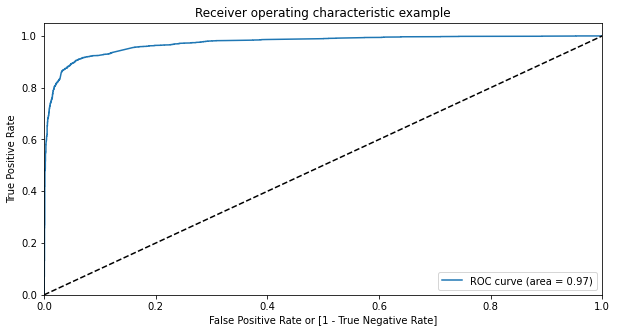

In [115]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.

Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:

In [116]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.006747,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.272802,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.004538,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.116302,8105,0,1,1,0,0,0,0,0,0,0,0
4,0,0.035909,3934,0,1,0,0,0,0,0,0,0,0,0


In [117]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.831633  0.972830  0.744628
0.2   0.2  0.906772  0.929035  0.893053
0.3   0.3  0.925015  0.915653  0.930785
0.4   0.4  0.928417  0.904704  0.943028
0.5   0.5  0.928108  0.886050  0.954023
0.6   0.6  0.928417  0.863747  0.968266
0.7   0.7  0.915894  0.813058  0.979260
0.8   0.8  0.906463  0.779805  0.984508
0.9   0.9  0.889610  0.726277  0.990255


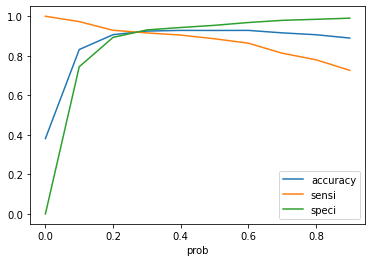

In [118]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [119]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.006747,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.272802,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.004538,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.116302,8105,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.035909,3934,0,1,0,0,0,0,0,0,0,0,0,0


In [120]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.006747,1871,0,1
1,0,0.272802,6795,0,27
2,0,0.004538,3516,0,0
3,0,0.116302,8105,0,12
4,0,0.035909,3934,0,4


In [121]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9250154607297465

In [122]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3725,  277],
       [ 208, 2258]], dtype=int64)

In [123]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [124]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9156528791565288

In [125]:
# Let us calculate specificity
TN / float(TN+FP)

0.9307846076961519

Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:

Accuracy : 92.50%

Sensitivity : 91.56%

Specificity : 93.07%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [126]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.06921539230384807


In [127]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8907297830374753


In [128]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3725,  277],
       [ 208, 2258]], dtype=int64)

In [129]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8907297830374753

In [130]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9156528791565288

In [131]:
from sklearn.metrics import precision_score, recall_score

In [132]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8907297830374753

In [133]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9156528791565288

In [134]:
from sklearn.metrics import precision_recall_curve

In [135]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

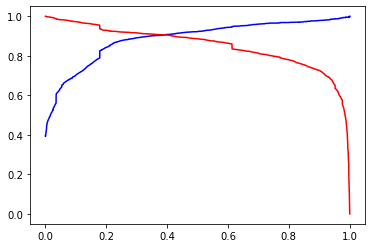

In [137]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


In [138]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Provided,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Tagged,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_opp hangup,Tags_switched off,City_Not Provided,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
4269,0.0,0.727273,0.448735,1.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2376,0.0,0.000000,0.000000,0.000000,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7766,0.0,0.454545,0.026187,0.833333,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
9199,0.0,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4359,0.0,0.000000,0.000000,0.000000,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [139]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Lost to EINS,Tags_Not Tagged,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
4269,0.0,0.448735,1.000000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2376,0.0,0.000000,0.000000,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
7766,0.0,0.026187,0.833333,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9199,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4359,0.0,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [140]:
X_test_sm = sm.add_constant(X_test)

# STEP 9:-PREDICTIONS ON TEST SET

In [141]:
y_test_pred = res.predict(X_test_sm)

In [142]:
y_test_pred[:20]

4269    0.698784
2376    0.996532
7766    0.872276
9199    0.004619
4359    0.975366
9186    0.990477
1631    0.973475
8963    0.957190
8007    0.032778
5324    0.989528
2558    0.194785
8973    0.005846
2935    0.942716
2907    0.999327
957     0.941176
493     0.975366
3179    0.939348
3545    0.015413
6140    0.054434
4877    0.872468
dtype: float64

In [148]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [149]:
# Let's see the head
y_pred_1.head()

,0
4269,0.698784
2376,0.996532
7766,0.872276
9199,0.004619
4359,0.975366


In [150]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [151]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [152]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [153]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [154]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.698784
1,1,2376,0.996532
2,1,7766,0.872276
3,0,9199,0.004619
4,1,4359,0.975366


In [155]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [156]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,4269,0.698784
1,1,2376,0.996532
2,1,7766,0.872276
3,0,9199,0.004619
4,1,4359,0.975366


In [157]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [158]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4269,1,0.698784,70
1,2376,1,0.996532,100
2,7766,1,0.872276,87
3,9199,0,0.004619,0
4,4359,1,0.975366,98


In [159]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [160]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4269,1,0.698784,70,1
1,2376,1,0.996532,100,1
2,7766,1,0.872276,87,1
3,9199,0,0.004619,0,0
4,4359,1,0.975366,98,1


In [161]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9278499278499278

In [162]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1552,  125],
       [  75, 1020]], dtype=int64)

In [163]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [164]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9315068493150684

In [165]:
# Let us calculate specificity
TN / float(TN+FP)

0.9254621347644604

In [166]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8908296943231441

In [167]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9315068493150684

Observation:
After running the model on the Test Data these are the figures we obtain:

Accuracy : 92.75%

Sensitivity : 92.54%

Specificity : 93.15%

# STEP 10 :-Final Observation:
Let us compare the values obtained for Train & Test:

Train Data: 

Accuracy : 92.50%

Sensitivity : 91.56%

Specificity : 93.07%

Test Data: 

Accuracy : 92.75%

Sensitivity : 92.54%

Specificity : 93.15%

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model